# Plot Temperature TS from aggregated product 

This notebook shows you how to plot the time series aggregated in a single file from the LTPS aggregation. It is important to note that the Aggregated-TimeSeries products are normally very big files with some millions of records. It is possible that some memory issues may arise running this notebook. 

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In this case the file is accessed from [AODN THREDDS](http://thredds.aodn.org.au/thredds/catalog/IMOS/catalog.html)  server 

In [2]:
fname = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/ANMN/QLD/PIL050/aggregated_timeseries/IMOS_ANMN-QLD_TZ_20120221_PIL050_FV01_TEMP-aggregated-timeseries_END-20140816_C-20190819.nc'

nc = xr.open_dataset(fname)

Look at the structure of the aggregated dataset. Note that in this case the file is an aggregation of TEMP from 16 instruments from the QLD site PIL050. The dimensions of the file are INSTRUMENT: the number of instruments aggregated and OBSERVATION the total number of observations combined from the 16 instruments

In [3]:
nc

<xarray.Dataset>
Dimensions:                   (INSTRUMENT: 16, OBSERVATION: 2781876)
Coordinates:
    TIME                      (OBSERVATION) datetime64[ns] ...
    LONGITUDE                 (INSTRUMENT) float32 ...
    LATITUDE                  (INSTRUMENT) float32 ...
    NOMINAL_DEPTH             (INSTRUMENT) float32 ...
Dimensions without coordinates: INSTRUMENT, OBSERVATION
Data variables:
    TEMP                      (OBSERVATION) float32 ...
    TEMP_quality_control      (OBSERVATION) float32 ...
    DEPTH                     (OBSERVATION) float32 ...
    DEPTH_quality_control     (OBSERVATION) int8 ...
    PRES                      (OBSERVATION) float32 ...
    PRES_quality_control      (OBSERVATION) float32 ...
    PRES_REL                  (OBSERVATION) float32 ...
    PRES_REL_quality_control  (OBSERVATION) float32 ...
    instrument_index          (OBSERVATION) int32 ...
    instrument_id             (INSTRUMENT) |S64 ...
    source_file               (INSTRUMENT) |S64 ..

You can PLOT TEMP against it OBSERVATION dimension and it will give you a full idea of all the time series combined one after the other.

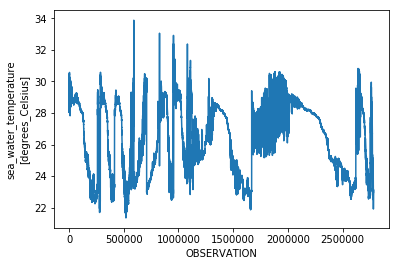

In [4]:
nc.TEMP.plot()

With this format is not recommended to directly plot the variable of interest (TEMP) against TIME, as you could have overlapping timestamps in the TIME variable sequence. 

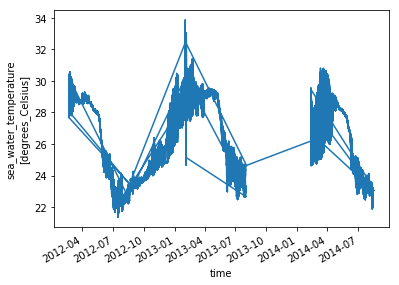

In [6]:
nc.TEMP.plot(x='TIME')

Let's have a look at the individual deployments, identified by the variable `instrument_index`. For that we can convert the xarray dataset to a pandas data frame which is more flexible and provide the results in a tabular format.

In [12]:
## convert to a data frame and close the nc connection
df = nc.to_dataframe()
nc.close()
df.columns

Index(['TEMP', 'TEMP_quality_control', 'TIME', 'DEPTH',
       'DEPTH_quality_control', 'PRES', 'PRES_quality_control', 'PRES_REL',
       'PRES_REL_quality_control', 'instrument_index', 'LONGITUDE', 'LATITUDE',
       'NOMINAL_DEPTH', 'instrument_id', 'source_file'],
      dtype='object')

We use the powerful `groupby` method to group by instrument and produce a summary table of basics statistics for `TEMP`

In [14]:
df.grouped = df.groupby(['instrument_index'])


In [12]:
df.grouped['TEMP'].describe()

,count,mean,std,min,25%,50%,75%,max
instrument_index,,,,,,,,
0,4148160.0,26.884838,2.622774,22.240400,23.729601,27.613600,28.704700,30.569000
1,414816.0,26.041752,2.690200,21.690001,22.930000,27.709999,28.650000,29.469999
2,2074064.0,26.414576,2.575372,22.354900,23.744600,27.610500,28.715401,30.577700
3,2074064.0,25.895723,2.753637,21.345400,22.704700,27.687300,28.632500,29.454399
4,375936.0,24.808086,1.319306,22.840000,23.730000,24.629999,25.459999,29.320000
5,375952.0,25.497343,1.965282,23.131701,23.781000,25.118099,26.255899,33.877998
6,1879696.0,25.758133,2.116447,23.181601,23.806801,25.447800,27.220200,30.490499
7,1879696.0,24.813429,1.314867,22.840900,23.717899,24.611099,25.477699,30.019400
8,2041424.0,26.732534,2.356070,22.469700,24.006001,27.862200,28.959400,33.055302


For the plot, we want a common TIME scale, so extract the minimum and maximum time values

In [15]:
TIMEmin = df['TIME'].min()
TIMEmax = df['TIME'].max()


instrument_index
0     [AxesSubplot(0.125,0.2;0.775x0.68)]
1     [AxesSubplot(0.125,0.2;0.775x0.68)]
2     [AxesSubplot(0.125,0.2;0.775x0.68)]
3     [AxesSubplot(0.125,0.2;0.775x0.68)]
4     [AxesSubplot(0.125,0.2;0.775x0.68)]
5     [AxesSubplot(0.125,0.2;0.775x0.68)]
6     [AxesSubplot(0.125,0.2;0.775x0.68)]
7     [AxesSubplot(0.125,0.2;0.775x0.68)]
8     [AxesSubplot(0.125,0.2;0.775x0.68)]
9     [AxesSubplot(0.125,0.2;0.775x0.68)]
10    [AxesSubplot(0.125,0.2;0.775x0.68)]
11    [AxesSubplot(0.125,0.2;0.775x0.68)]
12    [AxesSubplot(0.125,0.2;0.775x0.68)]
13    [AxesSubplot(0.125,0.2;0.775x0.68)]
14    [AxesSubplot(0.125,0.2;0.775x0.68)]
15    [AxesSubplot(0.125,0.2;0.775x0.68)]
dtype: object

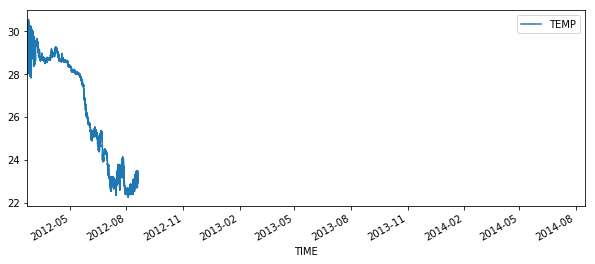

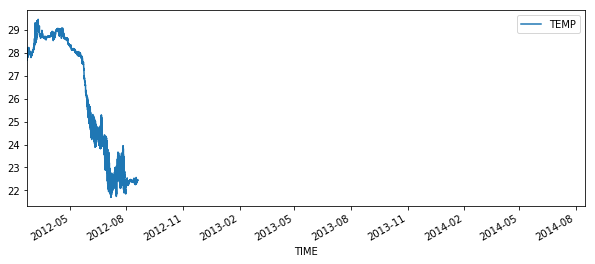

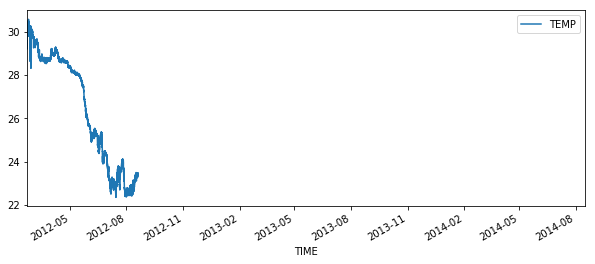

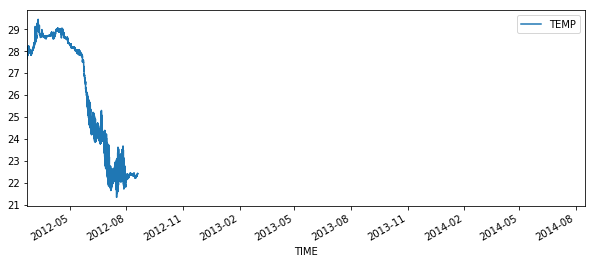

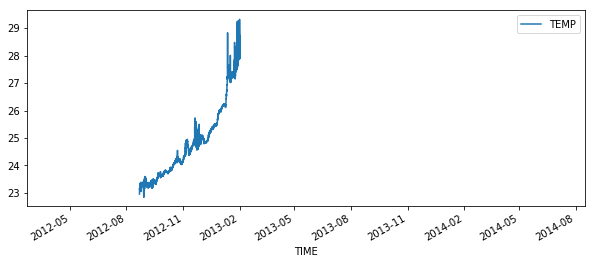

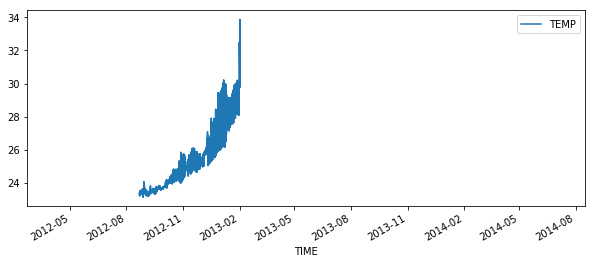

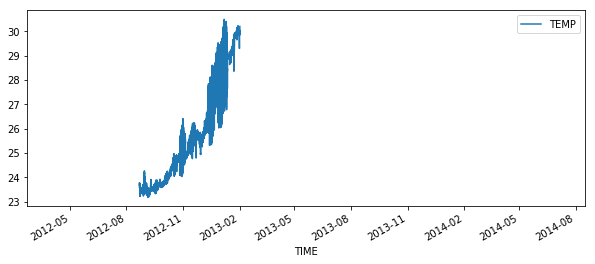

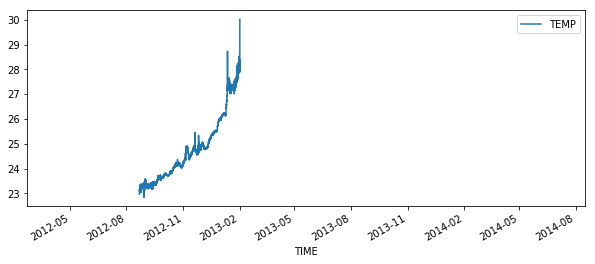

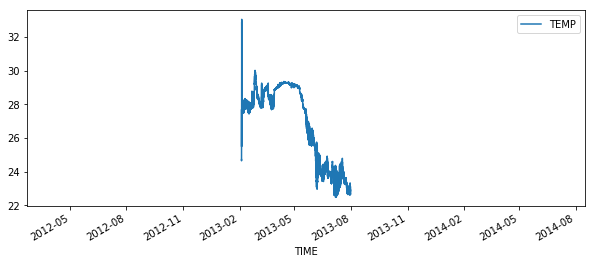

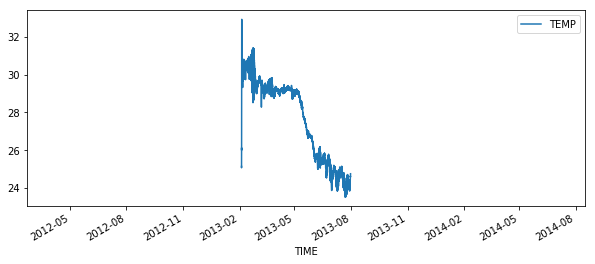

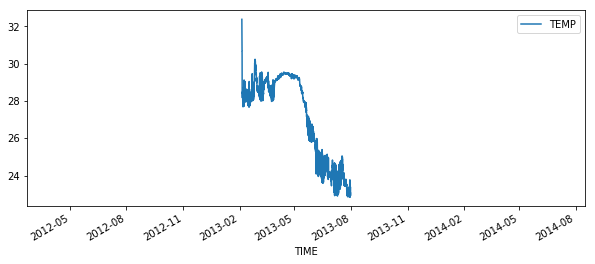

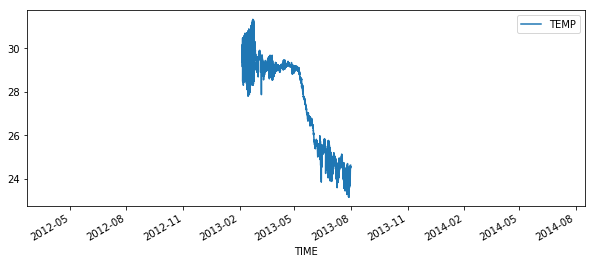

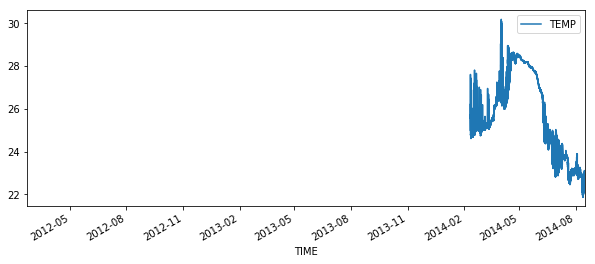

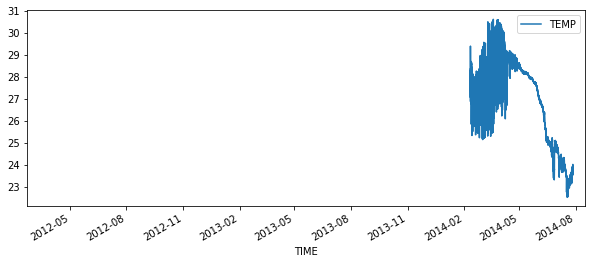

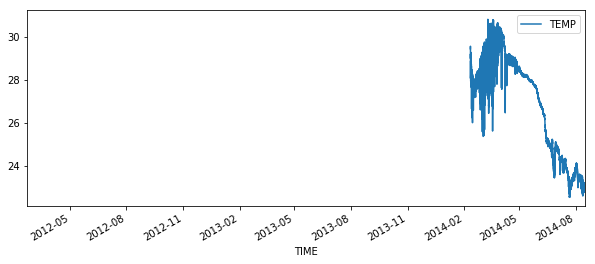

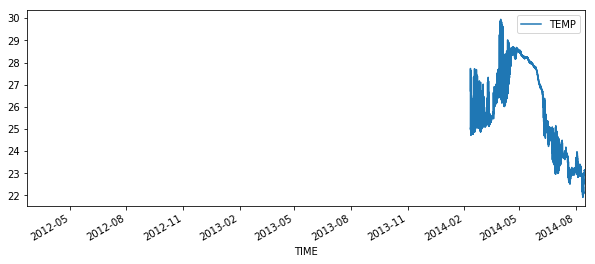

In [16]:
df.grouped.plot(x='TIME', y='TEMP', kind='line', subplots=True, xlim=(TIMEmin, TIMEmax), figsize=(10,4))

In [17]:
plt.close('all')